In [1]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
from HW5.variable_step_bdf_mol import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

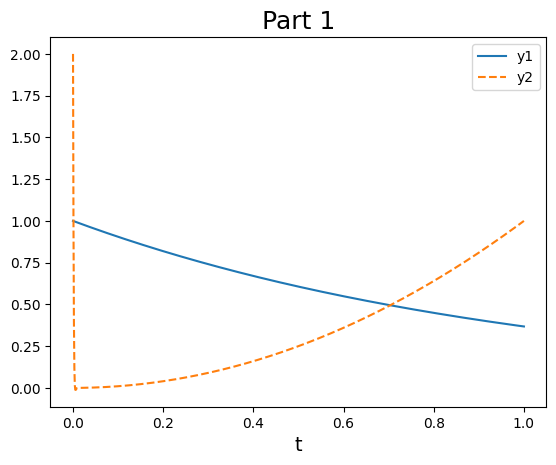

In [15]:
# Define functions: fi = yi', dfidyj = dfi / dyj (for the jacobian evaluation)

def f1(y1,y2,t):
    return -1*y1

def f2(y1,y2,t):
    return -1000*(y2 - t**2) + 2*t

def df1dy1(y1,y2,t):
    return -1

def df1dy2(y1,y2,t):
    return 0

def df2dy1(y1,y2,t):
    return 0

def df2dy2(y1,y2,t):
    return -1000

# Find y(t=.001) using theta method, needed to start second order BDF
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.001,
    t_end=.001,
    y0=[1,2],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

# Use second order BDF to solve the rest of the time domain
y_bdf = fixed_h_bdf(
    f=[f1,f2],
    h=.001,
    t_end=1,
    y0=y0,
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

plt.plot(np.arange(0,1.0001,.001), y_bdf[0,:], label='y1')
plt.plot(np.arange(0,1.0001,.001), y_bdf[1,:], label = 'y2', ls='--')
plt.legend()
plt.title('Part 1', fontsize=18)
plt.xlabel('t', fontsize=14)
plt.show()

# Part 2

## Question 1

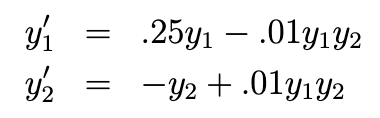

In [3]:
1e-6/.02467351**(1/3)

3.4349705775968313e-06

In [18]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
from HW5.variable_step_bdf_mol import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions: fi = yi', dfidyj = dfi / dyj (for the jacobian evaluation)

def f1(y1,y2,t):
    return .25*y1 - .01*y1*y2

def f2(y1,y2,t):
    return -y2 + .01*y1*y2

def df1dy1(y1,y2,t):
    return .25 - .01*y2

def df1dy2(y1,y2,t):
    return -.01*y1

def df2dy1(y1,y2,t):
    return .01*y2

def df2dy2(y1,y2,t):
    return -1 + .01*y1

# Find y(t=.01, .02) using theta method, needed to start second order BDF and get error estimate
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.01,
    t_end=.02,
    y0=[10,10],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

# List to store step sizes across time
h_list = [.01] * 2

# Obtain solution for the case with tol = 1e-3
soln11 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=100,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-3)

# List to store step sizes across time
h_list = [.01] * 2

# Obtain solution for the case with tol = 1e-6
soln12 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=100,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-6)

# Extract y values
y_bdf11 = np.array(soln11['y'])
y_bdf12 = np.array(soln12['y'])

### $\epsilon =1e-3$

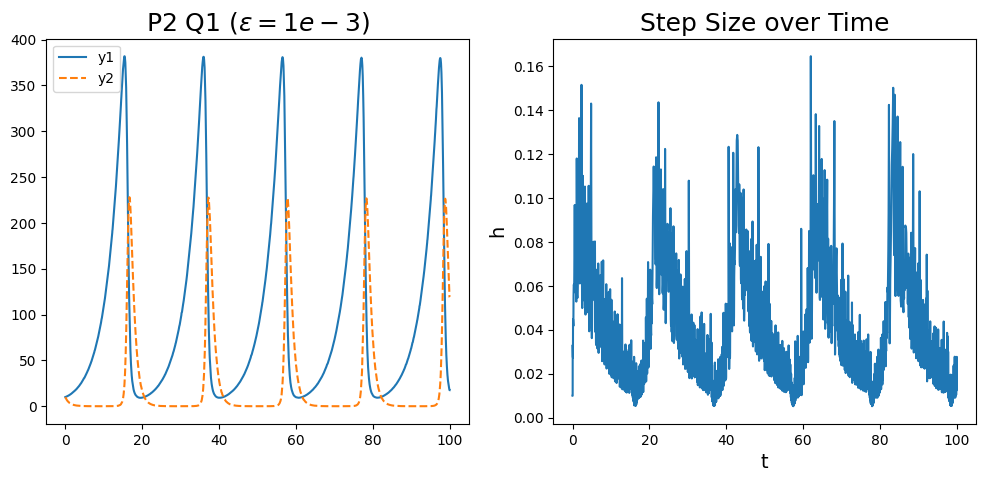

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(soln11['t'], y_bdf11[0,:], label = 'y1')
ax[0].plot(soln11['t'], y_bdf11[1,:], label = 'y2', ls='--')
ax[1].set_xlabel('t', fontsize=14)
ax[0].legend()
ax[0].set_title('P2 Q1 ($\epsilon =1e-3$)', fontsize=18)

ax[1].plot(soln11['t'][1:],soln11['h_list'])
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)
ax[1].set_title('Step Size over Time', fontsize=18)

plt.show()

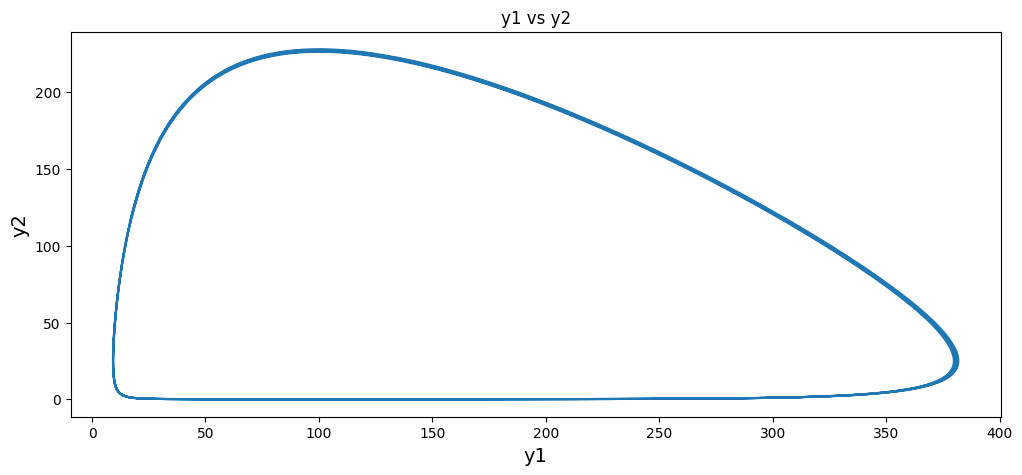

In [6]:
plt.figure(figsize=(12,5))
plt.plot(y_bdf11[0,:],y_bdf11[1,:])
plt.title('y1 vs y2')
plt.xlabel('y1', fontsize=14)
plt.ylabel('y2', fontsize=14)

plt.show()

### $\epsilon = 1e-6$

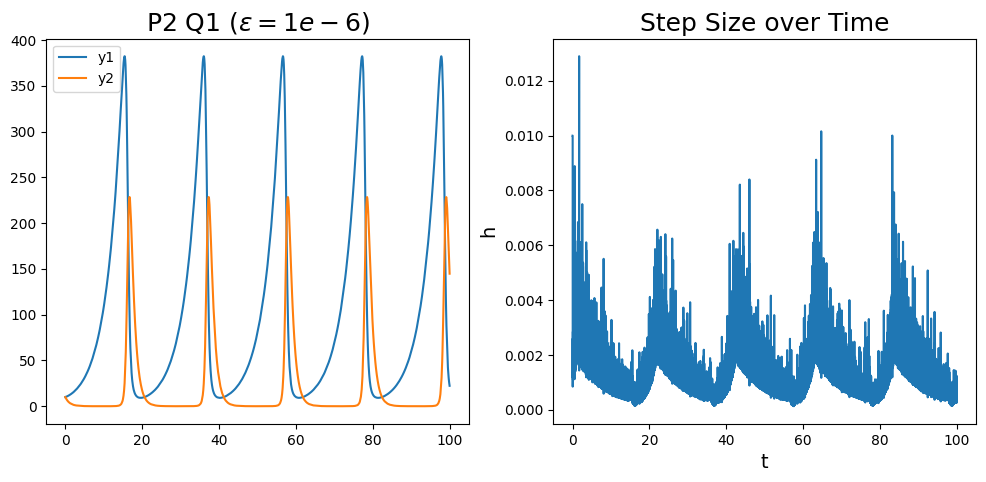

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(soln12['t'], y_bdf12[0,:], label = 'y1')
ax[0].plot(soln12['t'], y_bdf12[1,:], label = 'y2')
ax[1].set_xlabel('t', fontsize=14)
ax[0].legend()
ax[0].set_title('P2 Q1 ($\epsilon =1e-6$)', fontsize=18)

ax[1].plot(soln12['t'][1:],soln12['h_list'])
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)
ax[1].set_title('Step Size over Time', fontsize=18)


plt.show()

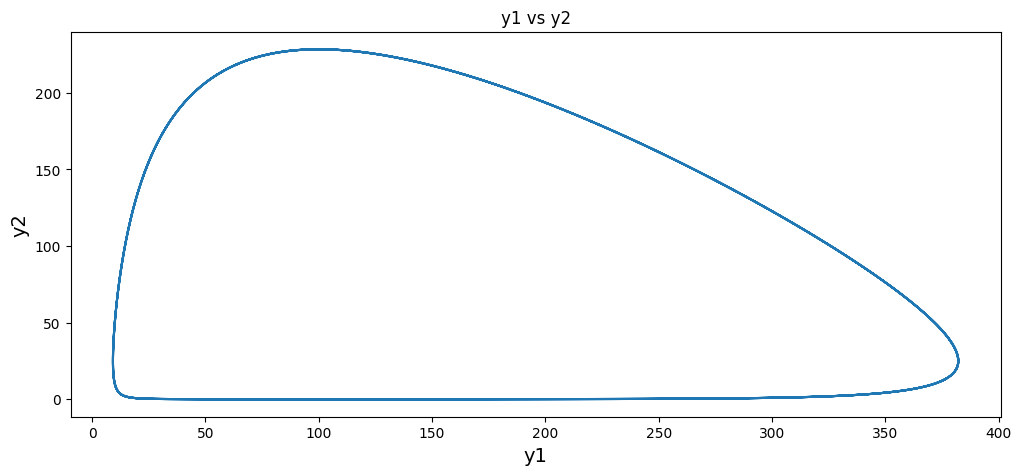

In [8]:
plt.figure(figsize=(12,5))
plt.plot(y_bdf12[0,:],y_bdf12[1,:])
plt.title('y1 vs y2')
plt.xlabel('y1', fontsize=14)
plt.ylabel('y2', fontsize=14)

plt.show()

## Question 2: Van der Pol's equation

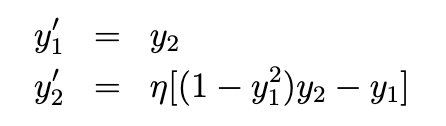

In [20]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f1(y1,y2,t):
    return y2

def f2(y1,y2,t):
    return 2*((1-y1**2)*y2 - y1)

def df1dy1(y1,y2,t):
    return 0

def df1dy2(y1,y2,t):
    return 1

def df2dy1(y1,y2,t):
    return 2*(-2*y1*y2 - 1)

def df2dy2(y1,y2,t):
    return 2*(1-y1**2)

# Find y(t=.01) using theta method, needed to start second order BDF
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.01,
    t_end=.02,
    y0=[2,0],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

h_list = [.01] * 2

soln21 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=11,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-3)

h_list = [.01] * 2

soln22 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=11,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-6)

y_bdf21 = np.array(soln21['y'])
y_bdf22 = np.array(soln22['y'])

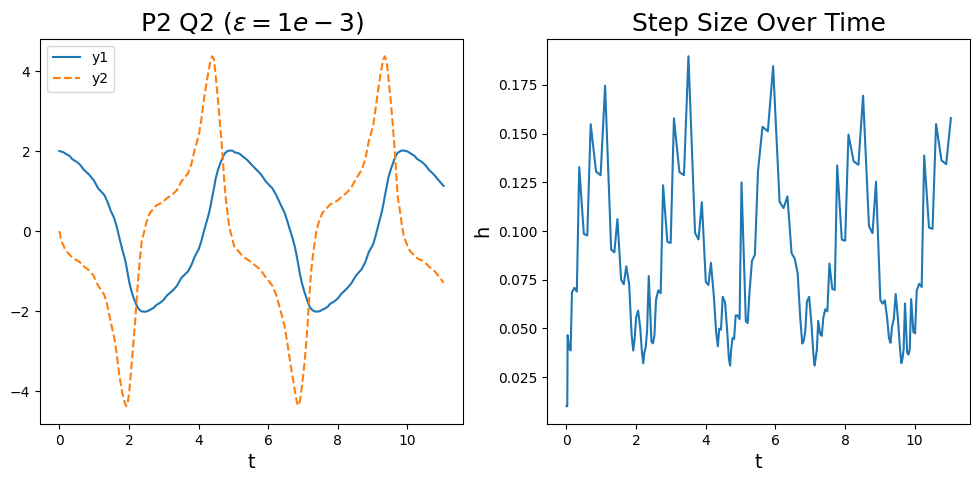

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(soln21['t'], y_bdf21[0,:], label='y1')
ax[0].plot(soln21['t'], y_bdf21[1,:], label='y2', ls='--')
ax[0].set_title('P2 Q2 ($\epsilon =1e-3$)', fontsize=18)
ax[0].set_xlabel('t', fontsize=14)
ax[0].legend()

ax[1].plot(soln21['t'][1:], soln21['h_list'])
ax[1].set_title('Step Size Over Time', fontsize=18)
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)


plt.show()

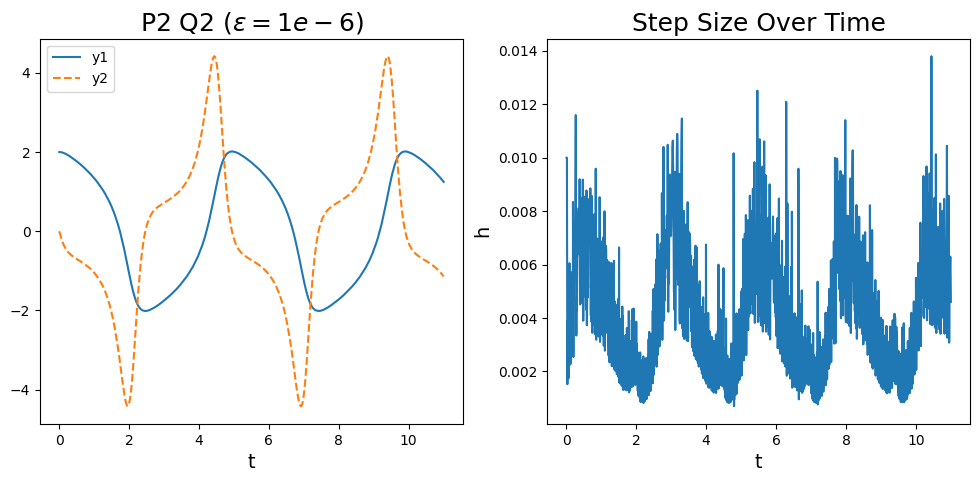

In [24]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(soln22['t'], y_bdf22[0,:], label='y1')
ax[0].plot(soln22['t'], y_bdf22[1,:], label='y2', ls='--')
ax[0].set_title('P2 Q2 ($\epsilon =1e-6$)', fontsize=18)
ax[0].set_xlabel('t', fontsize=14)
ax[0].legend()

ax[1].plot(soln22['t'][1:], soln22['h_list'])
ax[1].set_title('Step Size Over Time', fontsize=18)
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)


plt.show()

## Question 3: Method of Lines applied to diffusion equation PDE

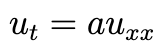

#### $\epsilon =1e-3$

In [12]:
sol = variable_h_bdf_mol(dx=.05,tol=1e-3)
y = sol['y']
t = sol['t']

df = pd.DataFrame(y)
df.loc[21] = pd.Series(t).round(4)
L = 1
dx=.05
x_vals = np.arange(0, L+dx, dx)

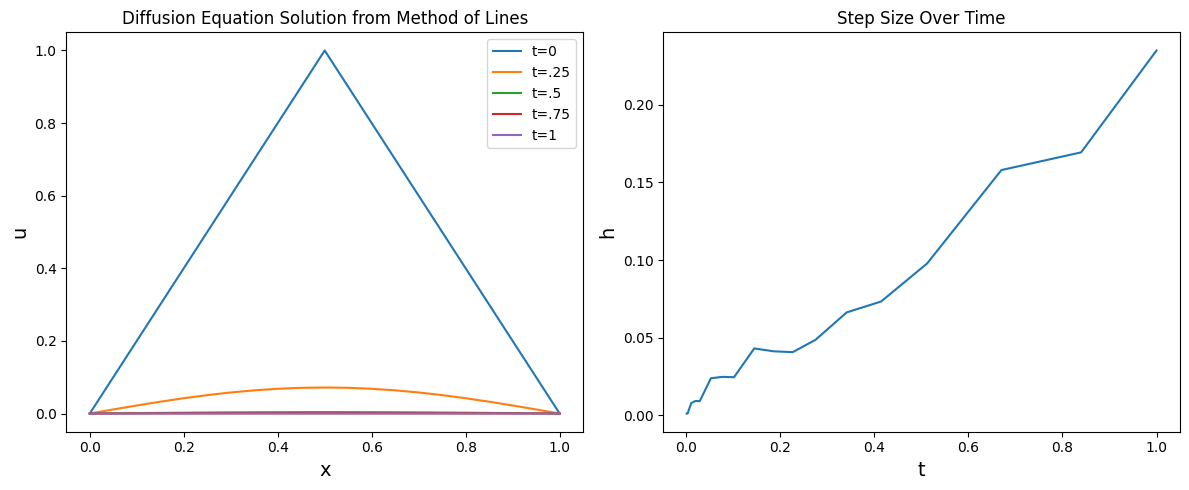

In [13]:
sol = variable_h_bdf_mol(dx=.05,tol=1e-3)
y = sol['y']
t = sol['t']

df = pd.DataFrame(y)
df.loc[21] = t
L = 1
dx=.05
x_vals = np.arange(0, L+dx, dx)


fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(x_vals,df[0][:-1], label='t=0')
ax[0].plot(x_vals,df[12][:-1], label='t=.25')
ax[0].plot(x_vals,df[16][:-1], label='t=.5')
ax[0].plot(x_vals,df[17][:-1], label='t=.75')
ax[0].plot(x_vals,df[19][:-1], label='t=1')
ax[0].set_title('Diffusion Equation Solution from Method of Lines')
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('u', fontsize=14)
ax[0].legend()

ax[1].plot(sol['t'][1:],sol['h_list'])
ax[1].set_title('Step Size Over Time')
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)

fig.tight_layout()

plt.show()

#### $\epsilon =1e-6$

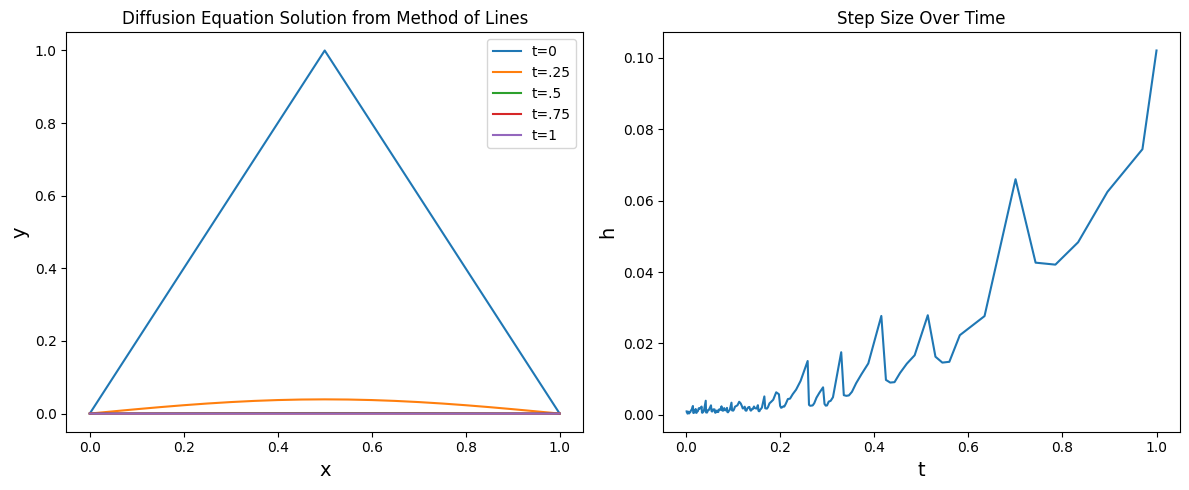

In [14]:
sol = variable_h_bdf_mol(dx=.05,tol=1e-6)
y = sol['y']
t = sol['t']

df = pd.DataFrame(y)
df.loc[21] = pd.Series(t).round(4)
L = 1
dx=.05
x_vals = np.arange(0, L+dx, dx)


fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(x_vals,df[0][:-1], label='t=0')
ax[0].plot(x_vals,df[140][:-1], label='t=.25')
ax[0].plot(x_vals,df[171][0:-1], label='t=.5')
ax[0].plot(x_vals,df[179][0:-1], label='t=.75')
ax[0].plot(x_vals,df[184][0:-1], label='t=1')
ax[0].set_title('Diffusion Equation Solution from Method of Lines')
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('y', fontsize=14)
ax[0].legend()

ax[1].plot(sol['t'][1:],sol['h_list'])
ax[1].set_title('Step Size Over Time')
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)

fig.tight_layout()

plt.show()